# Setup

In [10]:
'''
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
'''

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import label_binarize, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_curve, roc_auc_score, auc, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

# Load the dataset
df = pd.read_csv('Wine_QT.csv')

# Data Preperation

## 1) Get an overview over the dataset

This time we did that for you, just find out with what data you are dealing

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Data Seperation

In [5]:
# Split the dataset into training and testing sets. In this case 30% test & 70% training.
# Can this value change the results of your model?
X = df.drop('quality', axis=1)

x_trains, x_tests, y_train, y_test = train_test_split(X, df['quality'], test_size=0.3, stratify=df['quality'])

#Scaling our Data

scaler = StandardScaler()
x_train = scaler.fit_transform(x_trains)
x_test = scaler.transform(x_tests)

# Logistic Regression

In [6]:
# Create Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=1000000)

# Train the model on the training set
lr.fit (x_train, y_train)

# Predictions
y_predlr = lr.predict(x_test)

# Confusion Matrix

## 2) Creating a Confusion Matrix

Try to create a Confusion Matrix, by using the confusion matrix from sklearn. Try to understand the multi-class confusion matrix. What does it tell us?

In [7]:
cm = confusion_matrix(y_test, y_predlr)

print(cm)

[[  1   0   1   0   0   0]
 [  0   0   8   2   0   0]
 [  0   1 109  31   4   0]
 [  0   0  48  80  10   0]
 [  0   0   2  27  14   0]
 [  0   0   0   2   3   0]]


## 3) Accuracy, Precision, F1Score

Calculate Accuracy, Precision and F1 Score for your Confusion Matrix.

Check your results with the function classification_report.

What do you think, is the model good or bad?

##  4) ROC-Curve

In [8]:
#Vergleichsmodelle für unser erstes Modell

#Random Forest
rf = RandomForestClassifier(max_features=0.2, n_estimators=20) #OneVsRestClassifier
rf.fit(x_train, y_train)

#Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)

#y_predlr
y_predrf = rf.predict(x_test)
y_prednb = nb.predict(x_test)

lr_probs = lr.predict_proba(x_test)
rf_probs = rf.predict_proba(x_test)
nb_probs = nb.predict_proba(x_test)

Try to calculate the AUC-Score. What does it tell you?

In [13]:
# Predict probabilities for each class using the logistic regression model
lr_probs = lr.predict_proba(x_test)

# Calculate AUC score for logistic regression model
lr_auc = roc_auc_score(y_test, lr_probs, multi_class='ovr', average='weighted')
print('Logistic Regression AUC: %.3f' % lr_auc)

# Predict probabilities for each class using the random forest model
rf_probs = rf.predict_proba(x_test)

# Calculate AUC score for random forest model
rf_auc = roc_auc_score(y_test, rf_probs, multi_class='ovr', average='weighted')
print('Random Forest AUC: %.3f' % rf_auc)

# Predict probabilities for each class using the Naive Bayes model
nb_probs = nb.predict_proba(x_test)

# Calculate AUC score for Naive Bayes model
nb_auc = roc_auc_score(y_test, nb_probs, multi_class='ovr', average='weighted')
print('Naive Bayes AUC: %.3f' % nb_auc)

Logistic Regression AUC: 0.759
Random Forest AUC: 0.810
Naive Bayes AUC: 0.735


## 5) Different ROC-Curves

Evaluate the ROC-Curves. What can you learn out of these ROC-Curves?

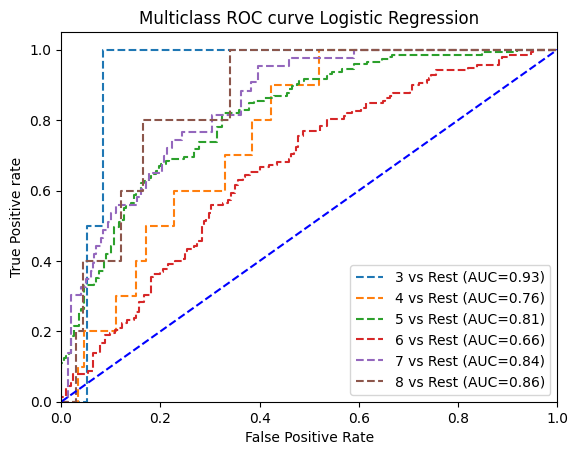

In [8]:
#Logistic Regression
#binarize the y_values
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes = np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict ()

n_class = classes.shape[0]

for i in (range(n_class)): #hier kann man auch nur einzelne Kurven sich anschauen, zur genaueren Betrachtung
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], lr_probs[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--', label = '%s vs Rest (AUC=%0.2f)' %(classes[i], roc_auc[i]))
    
plt.plot ([0,1], [0,1], 'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

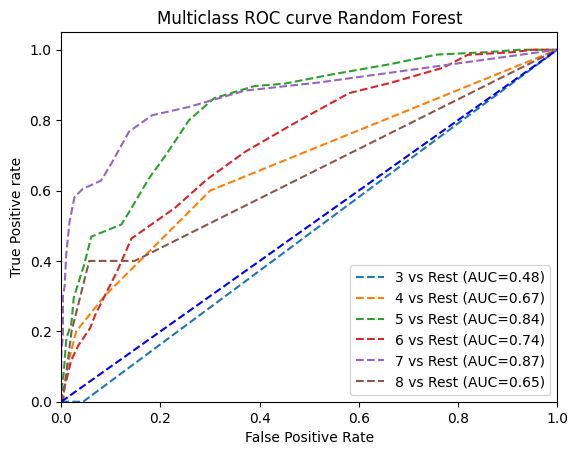

In [9]:
#Random Forest
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes = np.unique(y_test))

fpr = {}
tpr = {}
thresh = {}
roc_auc = dict ()

n_class = classes.shape[0]

for i in (range(n_class)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], rf_probs[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], linestyle='--', label = '%s vs Rest (AUC=%0.2f)' %(classes[i], roc_auc[i]))
    
plt.plot ([0,1], [0,1], 'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

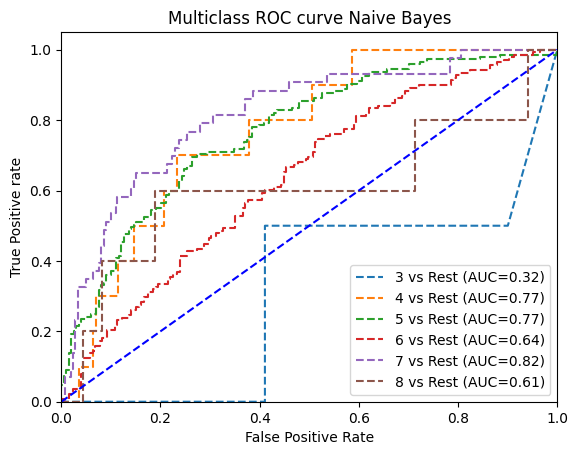

In [10]:
#Naive Bayes
#binarize the y_values
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes = np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict ()

n_class = classes.shape[0]

for i in (range(n_class)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], nb_probs[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--', label = '%s vs Rest (AUC=%0.2f)' %(classes[i], roc_auc[i]))
    
plt.plot ([0,1], [0,1], 'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

# Bias vs. Variance

The ultimate goal of any machine learning model is to learn from examples and generalize some degree of knowledge regarding the task we're training it to perform. 

But if we provide our Model with too much pre-built structure, we limit the models ability to learn. In this case our model is biased. Models with high bias pay little attention to the data presented; this is known as underfitting. Another cause for underfitting is, that we aren't using enough features to train the model. 

It is also possible that our model learns to much from the training data. Our Model captures the noise in data in addition to the signal, which causes high fluctuation. In this case our model has a high variance; this is known as overfitting.

In summary we want our model to sit somewhere in between these two extremes. 

## 6) Learning Curve

To visualize this you can use a learning curve. It shows the training and validation accuracy of different data splits. Down below you can find such curve, take a look at it, try to understand it and maybe extract some insights out of it.

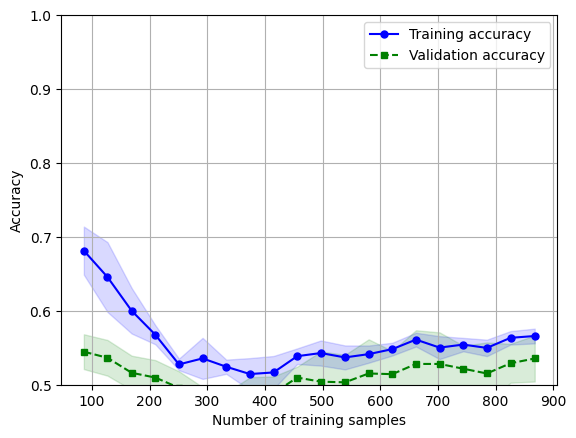

In [11]:
#Another split, to show the differences in the graph better.
X_train, X_test, Y_train, Y_test = train_test_split(X, df['quality'], test_size=0.05, stratify=df['quality'])

# Learning curve with Naive Bayes
train_sizes, train_scores, test_scores = learning_curve(
    nb, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 20), cv=None, scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.ylim([0.5, 1.0])
plt.show()

# Our Model as a Linear Regression

## 7) Evaluation of a Linear Regression

Use your know-how from last week and try to create this model as a Linear Regression. For the Evaluation calculate MSE, R-squared and MAE.